# Clustering

## $k$-means

- Data set: $\{ x_i \}_1^m$,
- Centroids: $\{ \mu_k \}_1^K$,
- Cluster assigned to $i$: $\{ c_i \}_1^m$,
- Cost function: $J(c, \mu) = \frac 1m \displaystyle\sum_{i=1}^m \| x_i - \mu_{c_i} \|^2$

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans

## Naïve $k$-means

In [2]:
def k_means(x, k, max_iter=10, init_mu=None):
    mu = x[np.random.choice(x.shape[0], size=k, replace=False)] if init_mu is None else init_mu
    C = lambda x, mu: np.argmin(cdist(x, mu), axis=1)

    for _ in range(max_iter):
        c = C(x, mu)
        for i in range(k):
            mu[i] = x[c == i].mean(axis=0)
    return C(x, mu), mu

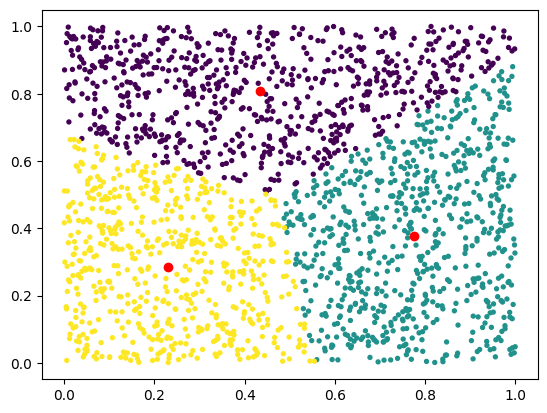

In [3]:
np.random.seed(42)

x = np.random.rand(2000, 2)
c, mu = k_means(x, 3, max_iter=100)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=c, s=8)
ax.scatter(mu[:, 0], mu[:, 1], color='red')
plt.show()

In [10]:
def update(i):
    global x, MU, C
    ax.clear()
    ax.scatter(x[:, 0], x[:, 1], c=C[i], s=8)
    ax.scatter(MU[i][:, 0], MU[i][:, 1], color='red')

np.random.seed(1)

k = 5
x = np.vstack((
    np.random.multivariate_normal(mean=[1, 0.5], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[-2, -2], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[+0, +2], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[-1, +0], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[+0, -3], cov=[[0.1, 0],[0, 0.1]], size=300),
))

mu = x[np.random.choice(x.shape[0], size=k, replace=False)]

MU = [mu]
C = [np.argmin(cdist(x, mu), axis=1)]

for _ in range(10):
    c, mu = k_means(x, k, max_iter=1, init_mu=mu)
    MU.append(mu.copy())
    C.append(c.copy())

fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames=len(MU), interval=500)
ani.save('kmeans.gif')
plt.close()

![kmeans](kmeans.gif)

## `scikit-learn`

In [5]:
%matplotlib inline

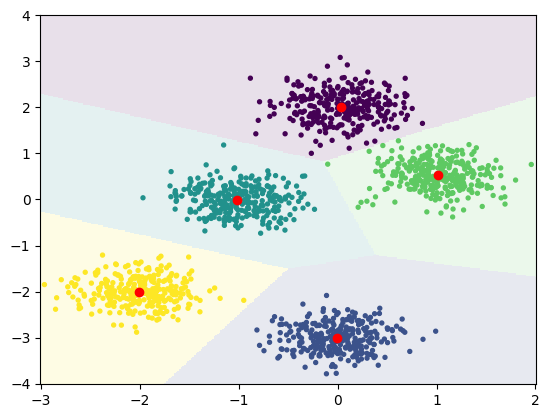

In [6]:
np.random.seed(1)

k = 5
x = np.vstack((
    np.random.multivariate_normal(mean=[1, 0.5], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[-2, -2], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[+0, +2], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[-1, +0], cov=[[0.1, 0],[0, 0.1]], size=300),
    np.random.multivariate_normal(mean=[+0, -3], cov=[[0.1, 0],[0, 0.1]], size=300),
))

kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(x)
c = kmeans.labels_
mu = kmeans.cluster_centers_

V, W = np.meshgrid(
    np.linspace(-3, 2, 300), 
    np.linspace(-4, 4, 300)
)
VW = np.hstack((V.flatten().reshape(-1, 1), W.flatten().reshape(-1, 1)))
H = kmeans.predict(VW).reshape(V.shape)

fig, ax = plt.subplots()
ax.pcolormesh(V, W, H, alpha=0.123)
ax.scatter(x[:, 0], x[:, 1], c=c, s=8)
ax.scatter(mu[:, 0], mu[:, 1], color='red')
plt.show()